In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler

In [8]:
DATA_FOLDER = 'dataset'
DATASET = os.path.join(DATA_FOLDER, 'outliers_labelled.csv')

In [9]:
df = pd.read_csv(DATASET)
numerical_attr_list = [col for col in df.columns if is_numeric_dtype(df[col])]
normalized_df = MinMaxScaler().fit_transform(df[numerical_attr_list].values)

In [14]:
code_map = dict(not_outlier="k", ABOD="g", LOF="r", ISFO="b")
def plot_outliers_in_embedding(embedding, df):
    plt.scatter(*embedding.T, color="k", s=5)
    plt.scatter(*(embedding[df.outlier_color != "k"]).T, c=df.outlier_color[df.outlier_color != "k"], alpha=0.6, s=50)

    from matplotlib.patches import Patch
    leg_handles, leg_lab = [], []
    for k,v in code_map.items():
        leg_handles.append(Patch(color=v))
        leg_lab.append(k)
    plt.legend(leg_handles, leg_lab);


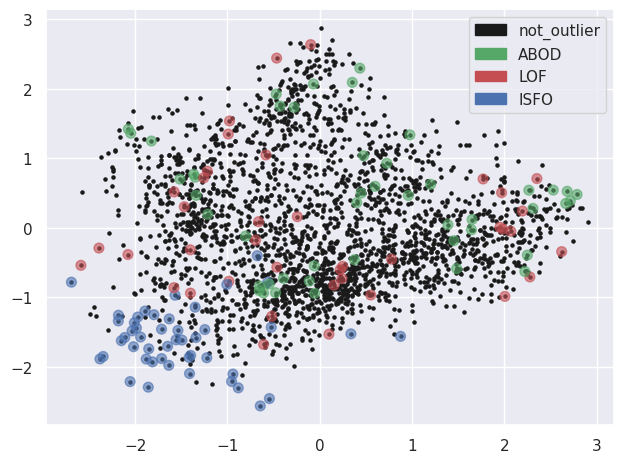

In [15]:
from sklearn.decomposition import PCA

res = PCA(n_components=2)
embedding = res.fit_transform(normalized_df)

plot_outliers_in_embedding(embedding, df)

/home/djanloo/.virtualenvs/DM2-PeqFRmfa/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/djanloo/.virtualenvs/DM2-PeqFRmfa/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/djanloo/.virtualenvs/DM2-PeqFRmfa/lib/python3.10/site-

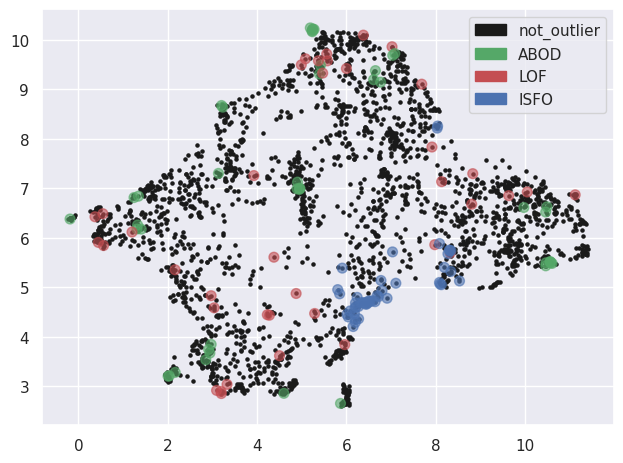

In [16]:
import umap

reducer = umap.UMAP(n_components=2, n_neighbors=50)
embedding = reducer.fit_transform(normalized_df)

plot_outliers_in_embedding(embedding, df)

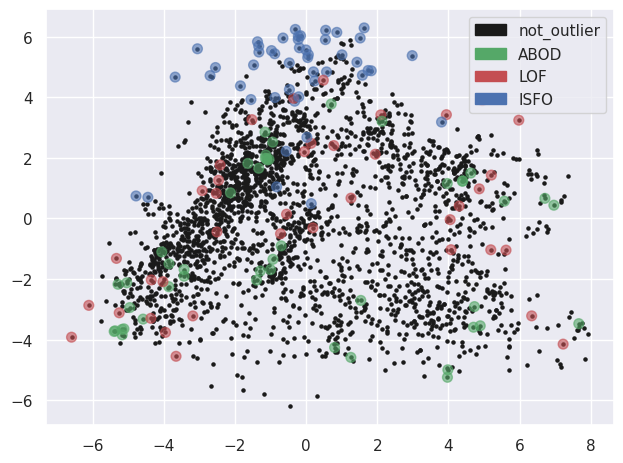

In [18]:
from sklearn.manifold import Isomap

reducer = Isomap(n_components=2, n_neighbors=15)
embedding = reducer.fit_transform(normalized_df)

plot_outliers_in_embedding(embedding, df)